Using the credit card data set provided on Blackboard.  
Perform anomaly detection via the following steps.
Perform EDA (use visuals where appropriate).  Pay attention to the class balance.  
Is the data balanced?

Based on results data is highly imbalanced.
<pre>Non-Fraud: 99.827% of the data.
Fraud: 0.173% of the data.

In [ ]:
import pandas as pd

# Load the dataset to inspect and analyze it
file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
credit_card_data = pd.read_csv(file_path)

# Display basic information about the dataset
credit_card_data_info = {
    "shape": credit_card_data.shape,
        "class_distribution": credit_card_data['Class'].value_counts(normalize=True).to_dict(),
    "missing_values": credit_card_data.isnull().sum().to_dict(),

}

credit_card_data_info


{'shape': (284807, 31),
 'class_distribution': {0: 0.9982725143693799, 1: 0.001727485630620034},
 'missing_values': {'Time': 0,
  'V1': 0,
  'V2': 0,
  'V3': 0,
  'V4': 0,
  'V5': 0,
  'V6': 0,
  'V7': 0,
  'V8': 0,
  'V9': 0,
  'V10': 0,
  'V11': 0,
  'V12': 0,
  'V13': 0,
  'V14': 0,
  'V15': 0,
  'V16': 0,
  'V17': 0,
  'V18': 0,
  'V19': 0,
  'V20': 0,
  'V21': 0,
  'V22': 0,
  'V23': 0,
  'V24': 0,
  'V25': 0,
  'V26': 0,
  'V27': 0,
  'V28': 0,
  'Amount': 0,
  'Class': 0}}

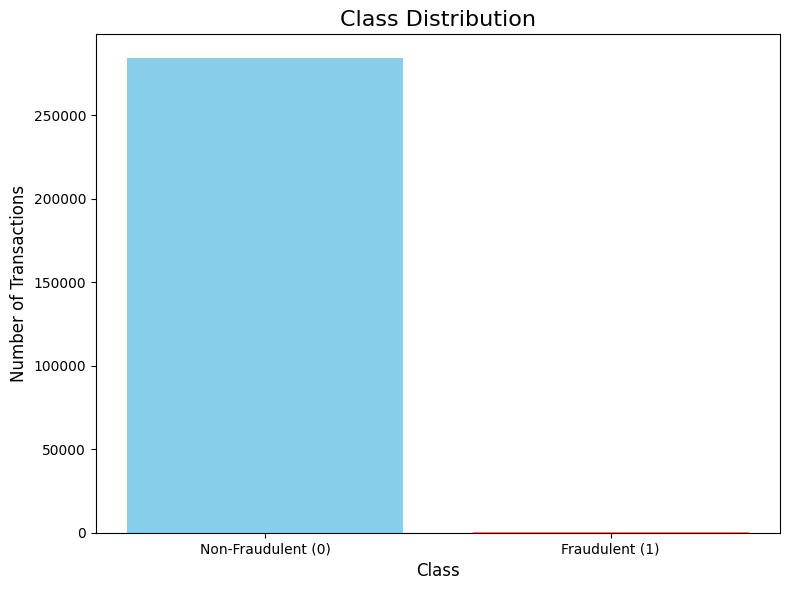

In [5]:
import matplotlib.pyplot as plt

# Visualizing the class distribution
class_counts = credit_card_data['Class'].value_counts()
class_labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


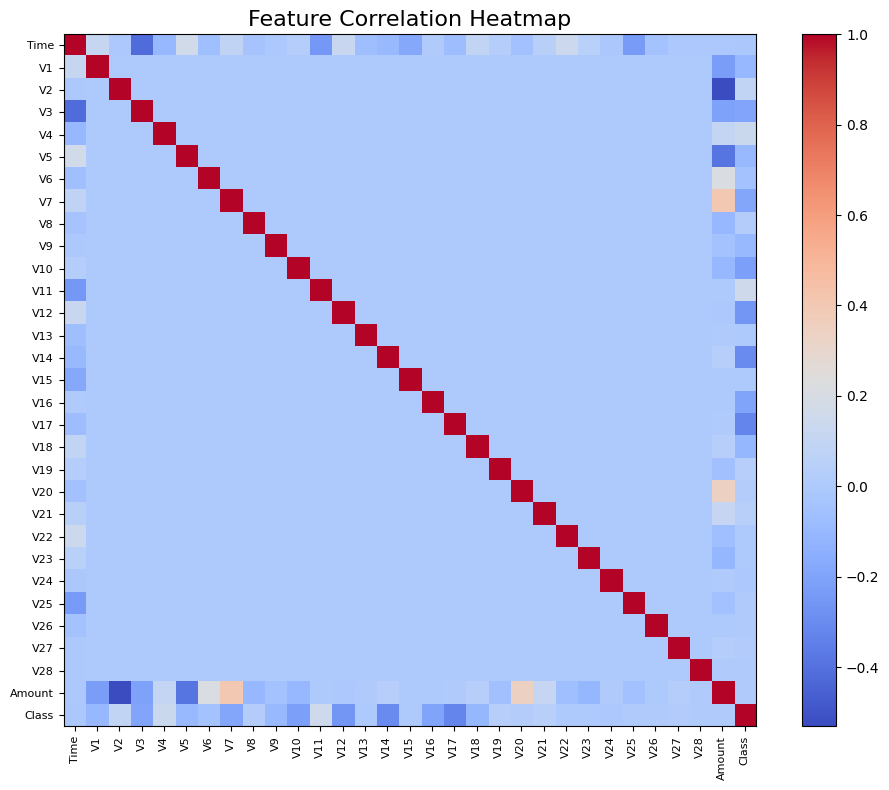

In [ ]:
# Compute the correlation matrix
correlation_matrix = credit_card_data.corr()

# Heatmap plot of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=8, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=8)
plt.tight_layout()
plt.show()


# Test train split the data.  Ensure class balance is maintained.

In [ ]:

file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
credit_card_data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Perform a stratified train-test split to ensure class balance is maintained
from sklearn.model_selection import train_test_split

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calculate class distribution in training and testing sets
train_class_distribution = y_train_balanced.value_counts(normalize=True).to_dict()
test_class_distribution = y_test_balanced.value_counts(normalize=True).to_dict()

# Display class distributions
class_balance_info = {
    "training_set": train_class_distribution,
    "testing_set": test_class_distribution
}

class_balance_info


{'training_set': {0: 0.9982707542408216, 1: 0.001729245759178389},
 'testing_set': {0: 0.9982795547909132, 1: 0.0017204452090867595}}

## Scale the data with a standard scaler.
<pre>Add a markdown cell and discuss the problem of information leakage from 
train to test if scaling takes place before test train split.

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scaling the training and testing data independently to prevent information leakage
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_balanced)

# Adding a markdown cell discussing the problem of information leakage

markdown_content = """
### The Problem of Information Leakage in Scaling

Information leakage happens when data from the test set influences the training process, 
leading to very optimistic model performance that doesn't generalize well to unseen data.

#### How Information Leakage Happens in Scaling
If the entire dataset is scaled before splitting into training and testing sets, the scaler
uses information from both sets (e.g., mean and standard deviation of the entire dataset). 
This introduces knowledge of the test data into the training process, potentially biasing 
the model's evaluation on the test data.

#### Solution
To prevent information leakage:
- The scaler should be fit only on the training set.
- The test set should be scaled using the parameters (mean and standard deviation) learned 
from the training set.
This approach ensures that the test set remains unseen during training, providing an accurate 
assessment of model performance.
"""

markdown_content


"\n### The Problem of Information Leakage in Scaling\n\nInformation leakage happens when data from the test set influences the training process, \nleading to very optimistic model performance that doesn't generalize well to unseen data.\n\n#### How Information Leakage Happens in Scaling\nIf the entire dataset is scaled before splitting into training and testing sets, the scaler\nuses information from both sets (e.g., mean and standard deviation of the entire dataset). \nThis introduces knowledge of the test data into the training process, potentially biasing \nthe model's evaluation on the test data.\n\n#### Solution\nTo prevent information leakage:\n- The scaler should be fit only on the training set.\n- The test set should be scaled using the parameters (mean and standard deviation) learned \nfrom the training set.\nThis approach ensures that the test set remains unseen during training, providing an accurate \nassessment of model performance.\n"

# Use a grid search to arrive at best hyperparameters for 2 models.
<pre>Isolation Forest & DBSCAN
Display the optimal parameters

# Results for Isolation Forest
<pre>
Best Parameters: 
{'contamination': 0.01, 'max_features': 0.5, 'max_samples': 0.5, 
'n_estimators': 100, 'random_state': 42}

Best F1 Score: 0.21430709368452558

In [10]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Load the dataset
file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
data = pd.read_csv(file_path)

# Inspect dataset and select features
print(data.info())

# Selecting numerical features for training (excluding target column)
features = [col for col in data.columns if col not in ['Class']]
X = data[features]
y = data['Class']  # Assuming 'Class' is the target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid for Isolation Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.5, 0.75],
    'contamination': [0.01, 0.05, 0.1],  # Assuming dataset has imbalanced labels
    'max_features': [1.0, 0.8, 0.5],
    'random_state': [42]
}

# Perform custom grid search
best_params = None
best_score = -1

for params in ParameterGrid(param_grid):
    model = IsolationForest(**params)
    model.fit(X_scaled)
    y_pred = model.predict(X_scaled)
    y_pred = [1 if x == -1 else 0 for x in y_pred]  # Map -1 to anomaly (1) and 1 to normal (0)
    score = f1_score(y, y_pred)  # Use F1-score as the evaluation metric
    print(f"Params: {params}, F1 Score: {score}")

    if score > best_score:
        best_score = score
        best_params = params

# Print best parameters and score
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Do the same for DBSCAN

# Results for DBSCAN
<pre>Best Parameters: {'eps': 0.7, 'min_samples': 5, 'metric': 'euclidean'}
Best Silhouette Score: -0.3361960215385066

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Load the dataset
file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
data = pd.read_csv(file_path)

# Inspect dataset and select features
print(data.info())

# Selecting numerical features for clustering (excluding the target column if present)
features = [col for col in data.columns if col not in ['Class']]  # Adjust if 'Class' is not the target column
X = data[features]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid for DBSCAN
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 20]
metrics = ['euclidean', 'manhattan']

# Grid search for DBSCAN
best_params = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
                clusters = dbscan.fit_predict(X_scaled)

                # Check if at least one cluster is formed (silhouette_score requires > 1 cluster)
                if len(set(clusters)) > 1:
                    score = silhouette_score(X_scaled, clusters)
                    print(f"Params: eps={eps}, min_samples={min_samples}, metric={metric}, Silhouette Score: {score}")

                    if score > best_score:
                        best_score = score
                        best_params = {'eps': eps, 'min_samples': min_samples, 'metric': metric}
            except Exception as e:
                print(f"Params: eps={eps}, min_samples={min_samples}, metric={metric} caused an error: {e}")

# Print best parameters and score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Train and test models.
<pre>
Provide performance metrics. (e.g., F1, Precision, Recall)
Show confusion matrices and ROC AUC curves.
Used parameters fround above.

DBSCAN Silhouette Score: -0.3769

Isolation Forest:
F1 Score: 0.20
Precision: 0.12
Recall: 0.68
ROC AUC: 0.84


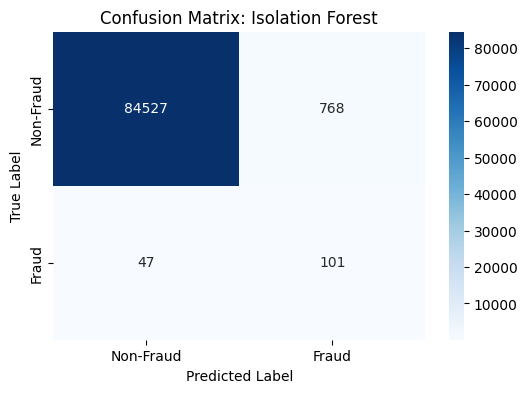


DBSCAN:
F1 Score: 0.00
Precision: 0.00
Recall: 1.00
ROC AUC: 0.61


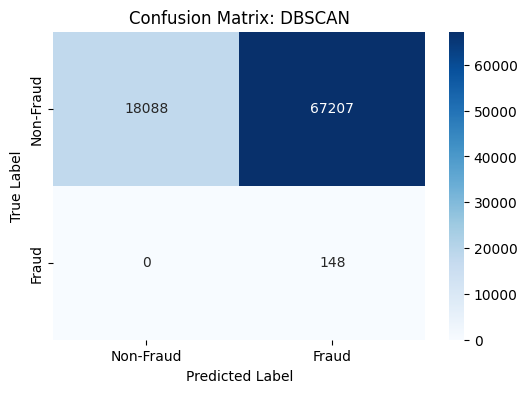

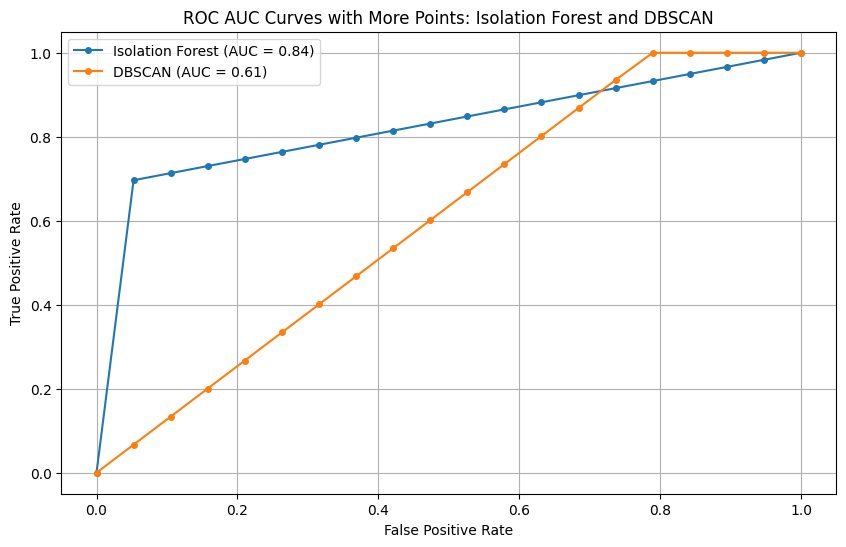

In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve, silhouette_score
)
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['Class'])  # Replace 'Class' with your target column
y = data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configure Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples=0.5,
    contamination=0.01,
    max_features=0.5,
    random_state=42
)

# Configure DBSCAN with best parameters
dbscan = DBSCAN(
    eps=0.7,
    min_samples=5,
    metric='euclidean'
)

# Train and test Isolation Forest
iso_forest.fit(X_train_scaled)
iso_preds = iso_forest.predict(X_test_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)  # Convert -1 (anomaly) to 1 (fraud), and 1 (normal) to 0

# Train and test DBSCAN
dbscan_clusters = dbscan.fit_predict(X_test_scaled)
dbscan_preds = np.where(dbscan_clusters == -1, 1, 0)  # Convert -1 (noise) to 1 (fraud), others to 0

# Evaluate Silhouette Score for DBSCAN
if len(set(dbscan_clusters)) > 1:
    sil_score = silhouette_score(X_test_scaled, dbscan_clusters)
else:
    sil_score = -1  # Silhouette Score is not meaningful with a single cluster
print(f"DBSCAN Silhouette Score: {sil_score:.4f}")

# Evaluate metrics and generate confusion matrices
models = {
    "Isolation Forest": iso_preds,
    "DBSCAN": dbscan_preds
}

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to plot a detailed ROC curve with at least 20 points
def plot_detailed_roc_curve(y_test, preds, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)

    # Ensure at least 20 points by interpolating if necessary
    num_points = max(len(fpr), 20)  # Ensure at least 20 points
    fpr_interp = np.linspace(0, 1, num_points)
    tpr_interp = np.interp(fpr_interp, fpr, tpr)

    plt.plot(fpr_interp, tpr_interp, label=f"{model_name} (AUC = {roc_auc:.2f})", marker='o', markersize=4)

# Calculate and visualize confusion matrices
for model_name, preds in models.items():
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    print(f"\n{model_name}:")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    
    # Plot the confusion matrix
    plot_confusion_matrix(cm, model_name)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
for model_name, preds in models.items():
    plot_detailed_roc_curve(y_test, preds, model_name)

# Customize the plot
plt.title('ROC AUC Curves with More Points: Isolation Forest and DBSCAN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


# Use PCA to reduce features to account for 80% of the variance in the data.

Train and test again to compare.


Number of components retained by PCA: 23
DBSCAN Silhouette Score (Original): -0.3769
DBSCAN Silhouette Score (PCA): -0.3514

Isolation Forest (Original):
F1 Score: 0.20
Precision: 0.12
Recall: 0.68
ROC AUC: 0.84


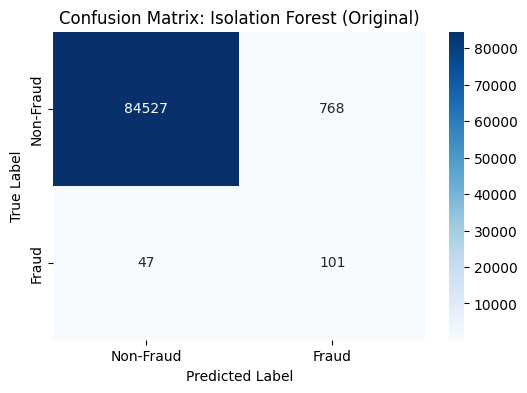


Isolation Forest (PCA):
F1 Score: 0.19
Precision: 0.11
Recall: 0.64
ROC AUC: 0.81


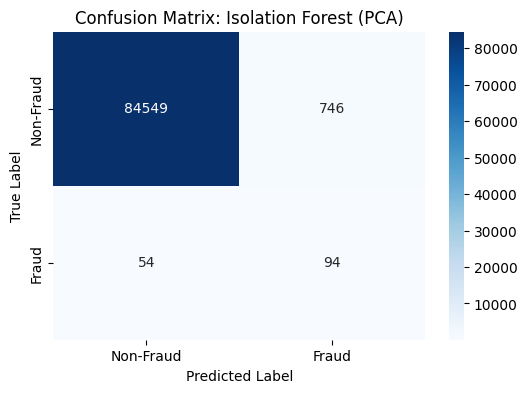


DBSCAN (Original):
F1 Score: 0.00
Precision: 0.00
Recall: 1.00
ROC AUC: 0.61


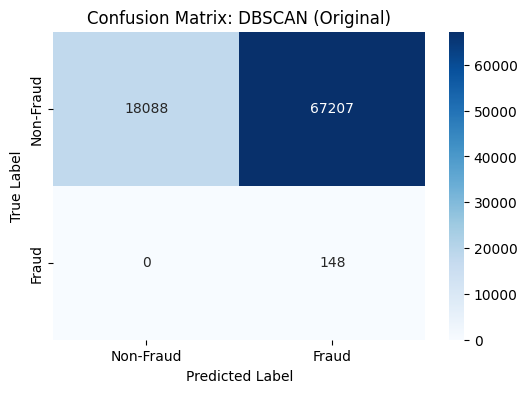


DBSCAN (PCA):
F1 Score: 0.00
Precision: 0.00
Recall: 1.00
ROC AUC: 0.63


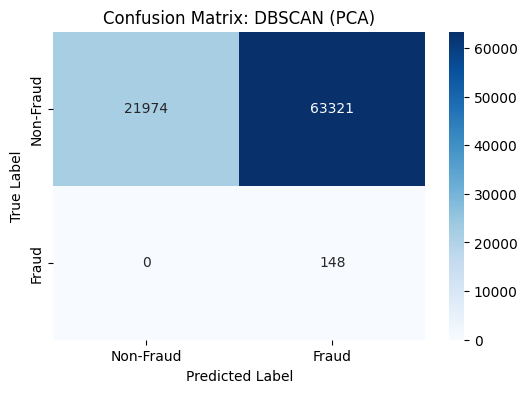

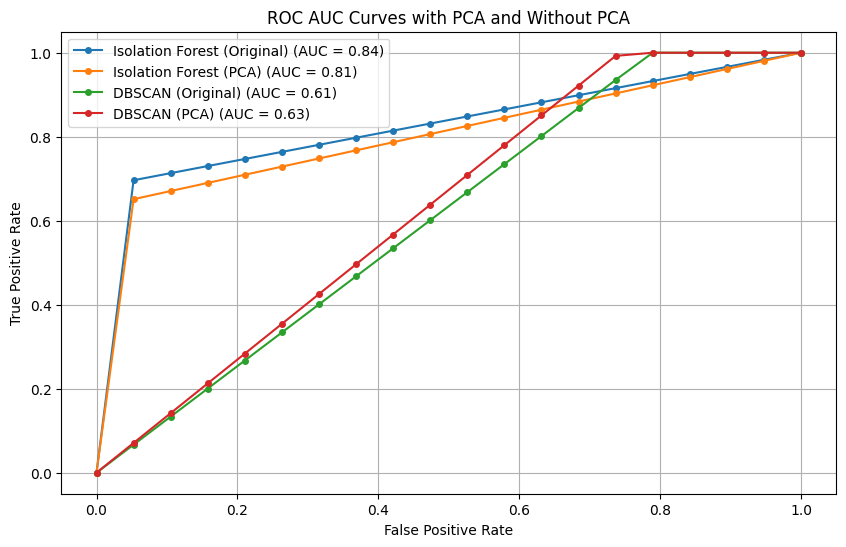

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve, silhouette_score
)
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/mls/SEAS/src/hw-assignment/creditcard.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['Class'])  # Replace 'Class' with your target column
y = data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce features to 80% variance
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components retained by PCA: {pca.n_components_}")

# Configure Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples=0.5,
    contamination=0.01,
    max_features=0.5,
    random_state=42
)

iso_forest_pca = IsolationForest(
    n_estimators=100,
    max_samples=0.5,
    contamination=0.01,
    max_features=0.5,
    random_state=42
)

# Configure DBSCAN with best parameters
dbscan = DBSCAN(
    eps=0.7,
    min_samples=5,
    metric='euclidean'
)

dbscan_pca = DBSCAN(
    eps=0.7,
    min_samples=5,
    metric='euclidean'
)

# Train and test Isolation Forest without PCA
iso_forest.fit(X_train_scaled)
iso_preds = iso_forest.predict(X_test_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)

# Train and test Isolation Forest with PCA
iso_forest_pca.fit(X_train_pca)
iso_preds_pca = iso_forest_pca.predict(X_test_pca)
iso_preds_pca = np.where(iso_preds_pca == -1, 1, 0)

# Train and test DBSCAN without PCA
dbscan_clusters = dbscan.fit_predict(X_test_scaled)
dbscan_preds = np.where(dbscan_clusters == -1, 1, 0)

# Train and test DBSCAN with PCA
dbscan_clusters_pca = dbscan_pca.fit_predict(X_test_pca)
dbscan_preds_pca = np.where(dbscan_clusters_pca == -1, 1, 0)

# Evaluate Silhouette Scores for DBSCAN
if len(set(dbscan_clusters)) > 1:
    sil_score = silhouette_score(X_test_scaled, dbscan_clusters)
else:
    sil_score = -1

if len(set(dbscan_clusters_pca)) > 1:
    sil_score_pca = silhouette_score(X_test_pca, dbscan_clusters_pca)
else:
    sil_score_pca = -1

print(f"DBSCAN Silhouette Score (Original): {sil_score:.4f}")
print(f"DBSCAN Silhouette Score (PCA): {sil_score_pca:.4f}")

# Evaluate metrics and generate confusion matrices
models = {
    "Isolation Forest (Original)": iso_preds,
    "Isolation Forest (PCA)": iso_preds_pca,
    "DBSCAN (Original)": dbscan_preds,
    "DBSCAN (PCA)": dbscan_preds_pca
}

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to plot a detailed ROC curve with at least 20 points
def plot_detailed_roc_curve(y_test, preds, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)

    # Ensure at least 20 points by interpolating if necessary
    num_points = max(len(fpr), 20)  # Ensure at least 20 points
    fpr_interp = np.linspace(0, 1, num_points)
    tpr_interp = np.interp(fpr_interp, fpr, tpr)

    plt.plot(fpr_interp, tpr_interp, label=f"{model_name} (AUC = {roc_auc:.2f})", marker='o', markersize=4)

# Calculate and visualize confusion matrices
for model_name, preds in models.items():
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    print(f"\n{model_name}:")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    
    # Plot the confusion matrix
    plot_confusion_matrix(cm, model_name)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
for model_name, preds in models.items():
    plot_detailed_roc_curve(y_test, preds, model_name)

# Customize the plot
plt.title('ROC AUC Curves with PCA and Without PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


# Analyze results.  
#### What conclusions can you make about the models’ ability to detect anomalies.  Which approaches worked best?

# Results Conclusion
### The Isolation Forest (Original) outperforms all other models, as per F1 Score, Precision, Recall, and ROC AUC. It does a good job at detecting anomalies. 12% Precision tells us that 12% of fraud cases are actual frauds and with a Recall of 68% we see that model identified 68% of all actual fraud cases.

### DBSCAN did not do a good job with this data set.
### Overall PCA did not provide any benefits from a detection perspective.